In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(20.0,10.0)

#reading data
df=pd.read_csv('headbrain.csv')
print(df.shape)
print(df.head())

(237, 4)
   Gender  Age Range  Head Size(cm^3)  Brain Weight(grams)
0       1          1             4512                 1530
1       1          1             3738                 1297
2       1          1             4261                 1335
3       1          1             3777                 1282
4       1          1             4177                 1590


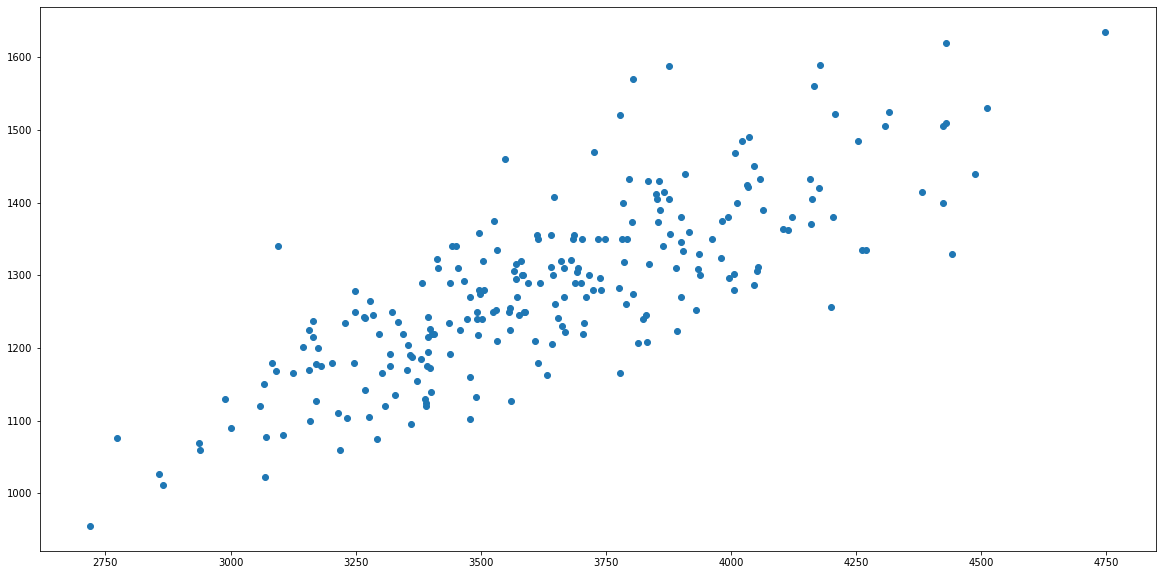

In [26]:
#collecting data
x=df['Head Size(cm^3)'].values
y=df['Brain Weight(grams)'].values
plt.scatter(x,y)
plt.show()

In [27]:
#mean x and y
mean_x=np.mean(x)
mean_y=np.mean(y)


# total number of values
l=len(x)


#using a formula to find m and c (y=mx+c)
numerator=0
denominator=0

for i in range(l):
    numerator+=(x[i]-mean_x)*(y[i]-mean_y)
    denominator+=(x[i]-mean_x)**2
m=numerator/denominator
c=mean_y-(m*mean_x)

print(m)
print(c)

0.26342933948939945
325.57342104944223


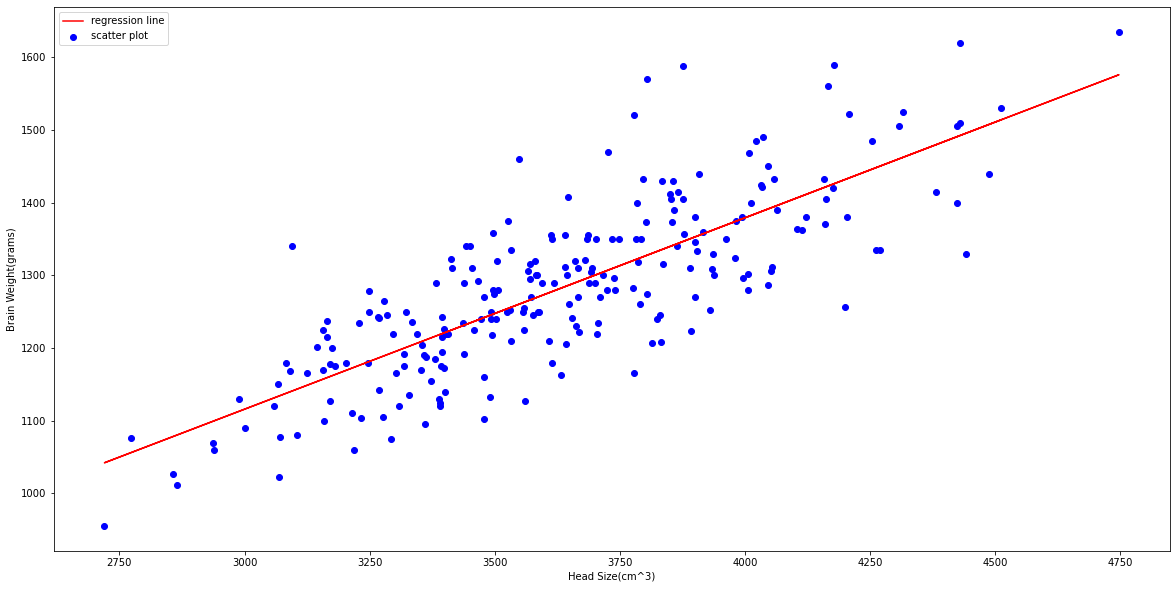

In [28]:
#plotting values and regression line

max_x=np.max(x) + 100
min_x=np.min(x) - 100

#calculating line value x & y 
#x=np.linspace(min_x,max_x,1000)
Y=m*x+c

#plotting line
plt.plot(x,Y,color='r' ,label='regression line')

#scatter plot
plt.scatter(x,y,c='b' ,label='scatter plot')

plt.xlabel('Head Size(cm^3)')
plt.ylabel('Brain Weight(grams)')
plt.legend()
plt.show()

In [21]:
# r^2 meathod to find how good our model is
ss_t=0 # total sum of square
ss_r=0 # total sum of residual
for i in range(l):
    y_pred=c+m*x[i]
    ss_t+=(y[i]-mean_y)**2
    ss_r+=(y[i]-y_pred)**2
r2=1-(ss_r/ss_t)
print(r2)

1.0


# using sklearn


In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#canot use rank 1 matrix in sklearn
x=x.reshape((-1,1))
#creating model
reg=LinearRegression()
# fitting training data
reg=reg.fit(x,y)
#y prediction
y_pred=reg.predict(x)

# CALCULATING R2 score
r2_score=reg.score(x,y)
print(r2_score)

1.0


In [14]:
import statsmodels.api as sm
X = df['Head Size(cm^3)']
y = df['Brain Weight(grams)']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                             OLS Regression Results                            
Dep. Variable:     Brain Weight(grams)   R-squared:                       0.639
Model:                             OLS   Adj. R-squared:                  0.638
Method:                  Least Squares   F-statistic:                     416.5
Date:                 Tue, 08 Dec 2020   Prob (F-statistic):           5.96e-54
Time:                         19:46:19   Log-Likelihood:                -1350.3
No. Observations:                  237   AIC:                             2705.
Df Residuals:                      235   BIC:                             2711.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             325.5734     4